## DataCo SMART SUPPLY CHAIN FOR BIG DATA ANALYSIS

A DataSet of Supply Chains used by the company DataCo Global was used for the analysis. Dataset of Supply Chain , which allows the use of Machine Learning Algorithms and R Software.

Areas of important registered activities : Provisioning , Production , Sales , Commercial Distribution.It also allows the correlation of Structured Data with Unstructured Data for knowledge generation.

<b>Type Data :</b> \
Structured Data : DataCoSupplyChainDataset.csv \
Unstructured Data : tokenized_access_logs.csv (Clickstream)

<b>Types of Products :</b> Clothing , Sports , and Electronic Supplies

Additionally it is attached in another file called DescriptionDataCoSupplyChain.csv, the description of each of the variables of the DataCoSupplyChainDatasetc.csv.

### Goal
The goal of this analysis is to predict whether the package delivery gonna be late or not (variable Late_delivery_risk)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

import logging
import json
import os
import sys
import warnings
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [2]:
data_raw = pd.read_csv("D:/Kuliah/semester_3/kecerdasan_buatan/Github/Artificial_Inteligence/Pertemuan_4/DataCoSupplyChainDataset.csv", encoding="ISO-8859-1")
data_unstructured = pd.read_csv("D:/Kuliah/semester_3/kecerdasan_buatan/Github/Artificial_Inteligence/Pertemuan_4/tokenized_access_logs.csv", encoding="ISO-8859-1")
data_desc = pd.read_csv("D:/Kuliah/semester_3/kecerdasan_buatan/Github/Artificial_Inteligence/Pertemuan_4/DescriptionDataCoSupplyChain.csv", encoding="ISO-8859-1")

In [3]:
# Column Description
data_desc

,FIELDS,DESCRIPTION
0,Type,: Type of transaction made
1,Days for shipping (real),: Actual shipping days of the purchased product
2,Days for shipment (scheduled),: Days of scheduled delivery of the purchased product
3,Benefit per order,: Earnings per order placed
4,Sales per customer,: Total sales per customer made per customer
5,Delivery Status,": Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time"
6,Late_delivery_risk,": Categorical variable that indicates if sending is late (1), it is not late (0)."
7,Category Id,: Product category code
8,Category Name,: Description of the product category
9,Customer City,: City where the customer made the purchase


In [4]:
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [5]:
data_unstructured.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20softball/product/adidas%20Brazuca%202017%20Official%20Match%20Ball
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20shooting/product/The%20North%20Face%20Women's%20Recon%20Backpack
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/product/adidas%20Kids'%20RG%20III%20Mid%20Football%20Cleat
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/product/Under%20Armour%20Men's%20Compression%20EV%20SL%20Slide
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports/product/Pelican%20Sunstream%20100%20Kayak


In [6]:
data_raw.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


Missing data is found on Customer Zipcode, Order Zipcode, and Product Description. Since those columns most likely wasnt going in training data, this can be ignored.

In [7]:
data_raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [8]:
data_raw.dtypes 

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [9]:
col_to_object = ["Customer Id", "Customer Zipcode", "Department Id", "Order Customer Id", "Order Id", "Order Item Cardprod Id", 
                 "Order Item Id", "Product Card Id", "Product Category Id", "Product Status", "Late_delivery_risk", "Category Id", 
                 "Latitude", "Longitude", "Order Zipcode", "Product Description"]
col_to_date =  ["order date (DateOrders)", "shipping date (DateOrders)"]

data_1 = data_raw
data_1[col_to_object] = data_1[col_to_object].astype(str)
data_1[col_to_date] = data_1[col_to_date].apply(pd.to_datetime, format='%m/%d/%Y %H:%M')

### Descriptive Statistics

In [10]:
print(data_1.describe(include='all'))

C:\Users\PC\AppData\Local\Temp\ipykernel_9612\3281304271.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data_1.describe(include='all'))


          Type  Days for shipping (real)  Days for shipment (scheduled)  \
count   180519             180519.000000                  180519.000000   
unique       4                       NaN                            NaN   
top      DEBIT                       NaN                            NaN   
freq     69295                       NaN                            NaN   
first      NaN                       NaN                            NaN   
last       NaN                       NaN                            NaN   
mean       NaN                  3.497654                       2.931847   
std        NaN                  1.623722                       1.374449   
min        NaN                  0.000000                       0.000000   
25%        NaN                  2.000000                       2.000000   
50%        NaN                  3.000000                       4.000000   
75%        NaN                  5.000000                       4.000000   
max        NaN           

C:\Users\PC\AppData\Local\Temp\ipykernel_9612\3281304271.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data_1.describe(include='all'))


Since SVM is relatively demanding algorithm, lets do stratified sampling based on Late_delivery_risk

In [11]:
data_1 = data_1.groupby('Late_delivery_risk', group_keys=False).apply(lambda x: x.sample(frac=0.1))

### Bar Chart

In [12]:
data_cat = data_1.select_dtypes(include=['object'])
data_cat.head()

,Type,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Id,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Status,Shipping Mode
114193,TRANSFER,Shipping on time,0,46,Indoor/Outdoor Games,Caguas,Puerto Rico,XXXXXXXXX,Bryan,2835,Gould,XXXXXXXXX,Corporate,PR,2275 Rustic Impasse,725.0,7,Fan Shop,18.20746803,-66.37057495,LATAM,Spanish Town,Jamaica,2835,2558,1014,6393,Caribbean,Santa Caterina,PROCESSING,nan,1014,46,nan,http://images.acmesports.sports/O%27Brien+Men%27s+Neoprene+Life+Vest,O'Brien Men's Neoprene Life Vest,0,Standard Class
126822,PAYMENT,Advance shipping,0,43,Camping & Hiking,Caguas,Puerto Rico,XXXXXXXXX,Mary,2627,King,XXXXXXXXX,Consumer,PR,1952 Noble Ramp,725.0,7,Fan Shop,18.29917717,-66.37059021,Europe,Opole,Polonia,2627,47202,957,117978,Eastern Europe,Opole,PENDING_PAYMENT,nan,957,43,nan,http://images.acmesports.sports/Diamondback+Women%27s+Serene+Classic+Comfort+Bike+2014,Diamondback Women's Serene Classic Comfort Bi,0,Standard Class
136236,TRANSFER,Shipping on time,0,17,Cleats,Union City,EE. UU.,XXXXXXXXX,Peter,3379,Smith,XXXXXXXXX,Consumer,NJ,8804 Cinder Dale Carrefour,7087.0,4,Apparel,40.7615242,-74.03826904,LATAM,Panama City,Panamá,3379,52493,365,131194,Central America,Panamá,PENDING,nan,365,17,nan,http://images.acmesports.sports/Perfect+Fitness+Perfect+Rip+Deck,Perfect Fitness Perfect Rip Deck,0,Standard Class
176857,DEBIT,Shipping on time,0,18,Men's Footwear,Caguas,Puerto Rico,XXXXXXXXX,Martha,2652,Santiago,XXXXXXXXX,Consumer,PR,8335 Little Rise Downs,725.0,4,Apparel,18.29319572,-66.37055206,USCA,San Francisco,Estados Unidos,2652,38521,403,96134,West of USA,California,COMPLETE,94122.0,403,18,nan,http://images.acmesports.sports/Nike+Men%27s+CJ+Elite+2+TD+Football+Cleat,Nike Men's CJ Elite 2 TD Football Cleat,0,Same Day
87706,PAYMENT,Shipping on time,0,18,Men's Footwear,Hamilton,EE. UU.,XXXXXXXXX,Mary,2548,Curtis,XXXXXXXXX,Consumer,OH,9414 Fallen Hickory Wood,45013.0,4,Apparel,39.28759003,-84.69515228,LATAM,Santiago de Cuba,Cuba,2548,55288,403,138273,Caribbean,Santiago de Cuba,PENDING_PAYMENT,nan,403,18,nan,http://images.acmesports.sports/Nike+Men%27s+CJ+Elite+2+TD+Football+Cleat,Nike Men's CJ Elite 2 TD Football Cleat,0,Standard Class


In [13]:
data_cat.nunique()

Type                          4
Delivery Status               4
Late_delivery_risk            2
Category Id                  51
Category Name                50
Customer City               561
Customer Country              2
Customer Email                1
Customer Fname              584
Customer Id                9556
Customer Lname             1022
Customer Password             1
Customer Segment              3
Customer State               44
Customer Street            5836
Customer Zipcode            992
Department Id                11
Department Name              11
Latitude                   6538
Longitude                  3387
Market                        5
Order City                 2776
Order Country               147
Order Customer Id          9556
Order Id                  15934
Order Item Cardprod Id      118
Order Item Id             18052
Order Region                 23
Order State                 929
Order Status                  9
Order Zipcode               446
Product 

In [14]:
retained_cat_col = ["Type", "Delivery Status", "Shipping Mode", "Late_delivery_risk"]
data_cat = data_cat[retained_cat_col]
data_cat.head()

,Type,Delivery Status,Shipping Mode,Late_delivery_risk
114193,TRANSFER,Shipping on time,Standard Class,0
126822,PAYMENT,Advance shipping,Standard Class,0
136236,TRANSFER,Shipping on time,Standard Class,0
176857,DEBIT,Shipping on time,Same Day,0
87706,PAYMENT,Shipping on time,Standard Class,0


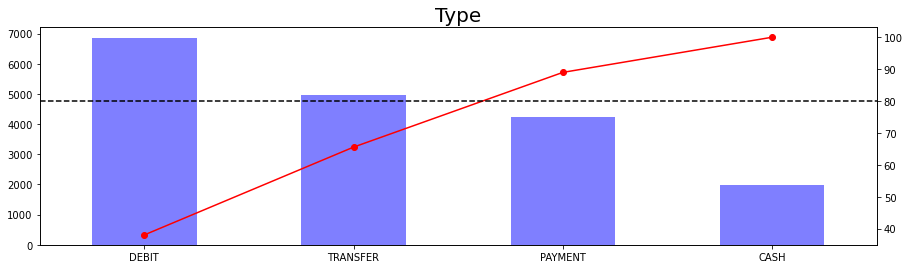

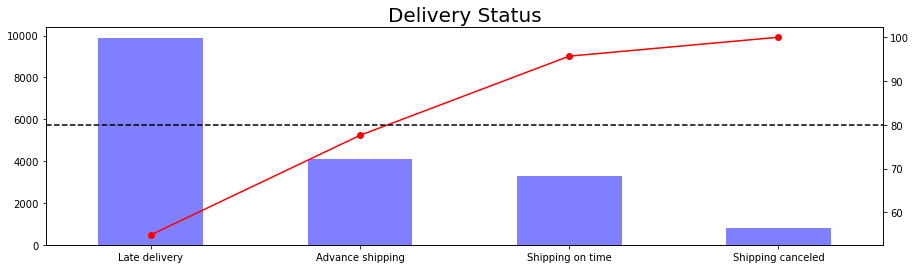

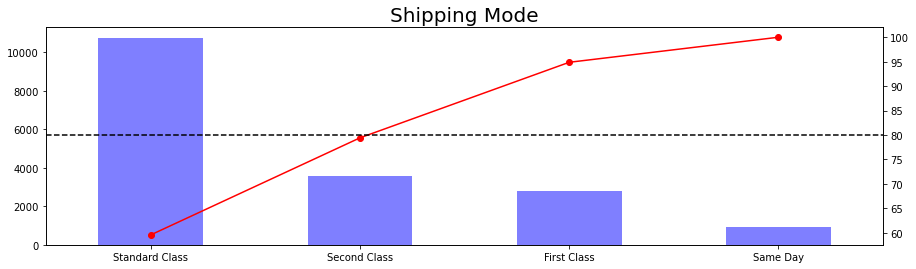

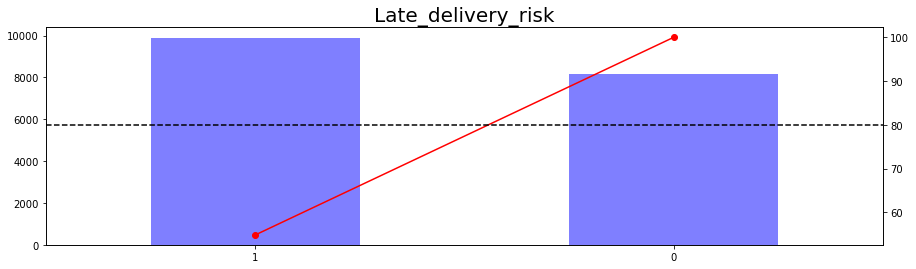

In [15]:
for column in data_cat:
    plt.figure(figsize=(15,4))
    
    # Calculate value counts and sort by descending order
    value_counts = data_cat[column].value_counts().sort_values(ascending=False)
    
    # Create bar chart
    value_counts.plot(kind='bar', color='blue', alpha=0.5)
    
    # Calculate cumulative sums and convert to percentage of total
    cumulative_sums = value_counts.cumsum() / value_counts.sum() * 100
    
    # Create Pareto line
    cumulative_sums.plot(kind='line', marker='o', color='red', secondary_y=True)

    # Add dotted line at 80%
    plt.axhline(y=80, color='k', linestyle='--')
    
    plt.title(column, fontdict={'fontsize': 20})
    plt.show()

From the visualization

a. about 80% type of transaction made consist of DEBIT, TRANSFER, and PAYMENT \
b. about 80% delivery status consist of Late Delivery, Advance Shipping, and Shipping on Time \
c. about 80% shipping mode used were Standard Class and Second Class \
d. Late delivery risk, which is the label we want to predict were almost equal in occurence

TODO-> bisa eksplorasi gimana statistiknya kalau Late delivery risk nya 0 dan 1

# Box Plot

In [16]:
data_num = data_1.select_dtypes(exclude=['object', 'datetime64[ns]'])
data_num.head()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
114193,4,4,27.709999,98.959999,1.0,0.01,49.980000,0.28,2,99.959999,98.959999,27.709999,49.980000
126822,3,4,122.660004,260.980011,39.0,0.13,299.980011,0.47,1,299.980011,260.980011,122.660004,299.980011
136236,4,4,1.710000,170.970001,9.0,0.05,59.990002,0.01,3,179.970001,170.970001,1.710000,59.990002
176857,0,0,-6.550000,103.989998,26.0,0.20,129.990005,-0.06,1,129.990005,103.989998,-6.550000,129.990005
87706,4,4,-185.240005,123.489998,6.5,0.05,129.990005,-1.50,1,129.990005,123.489998,-185.240005,129.990005


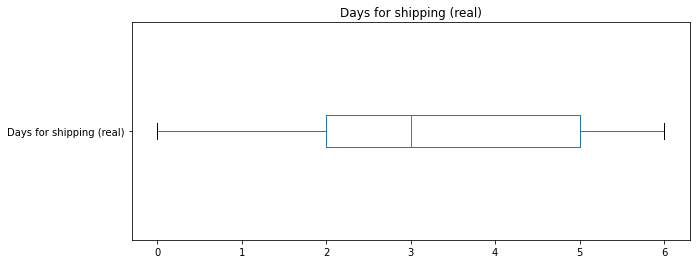

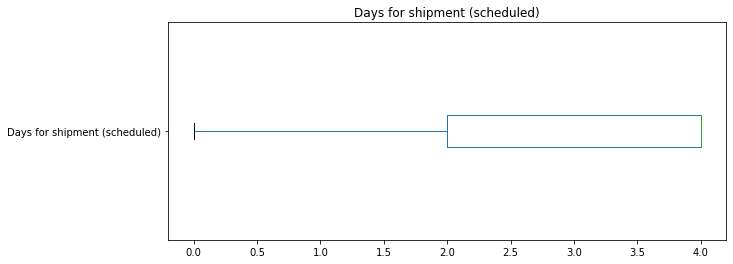

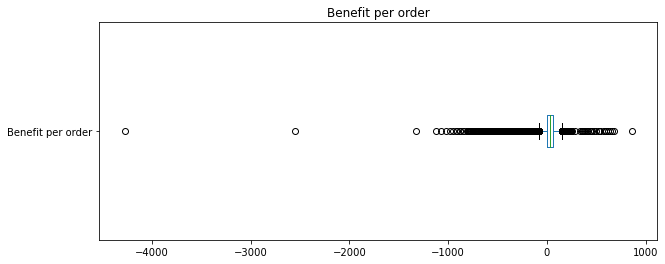

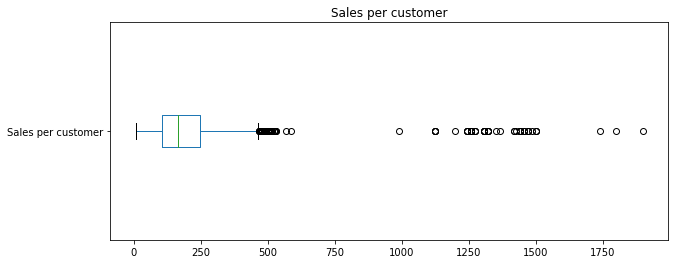

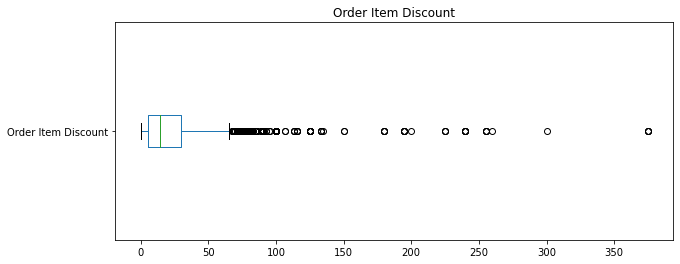

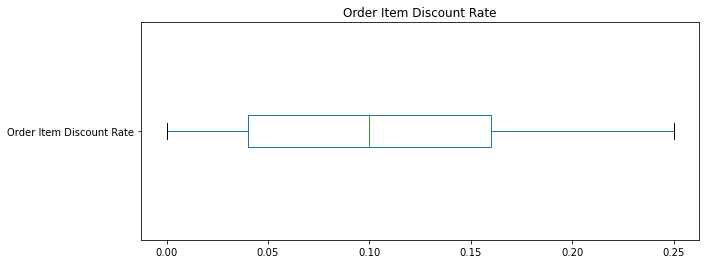

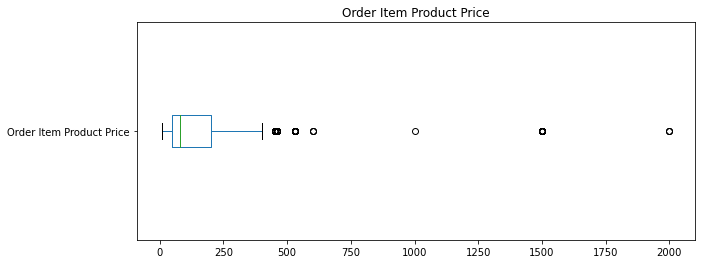

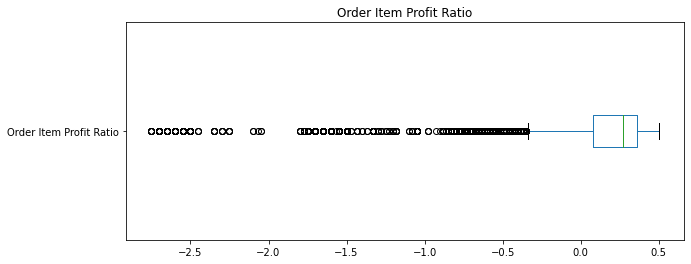

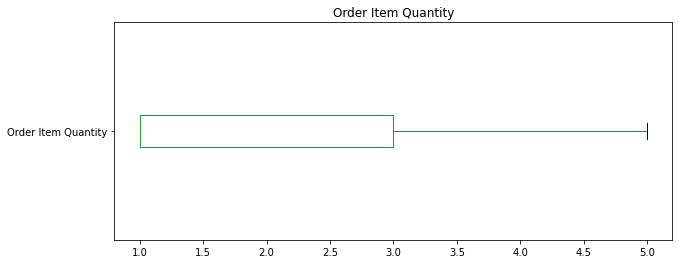

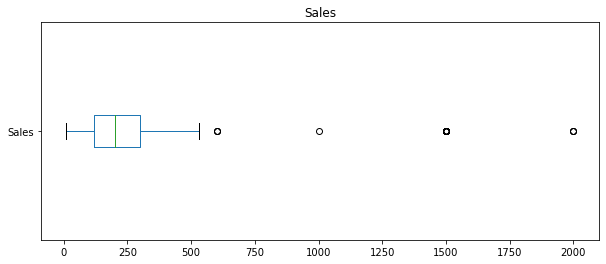

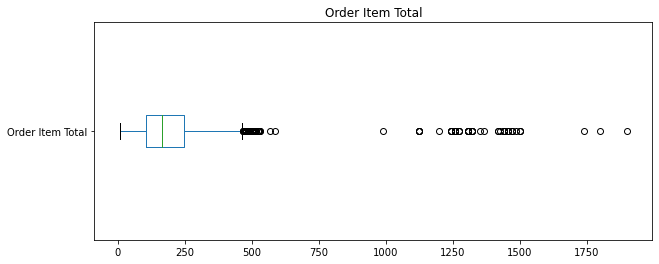

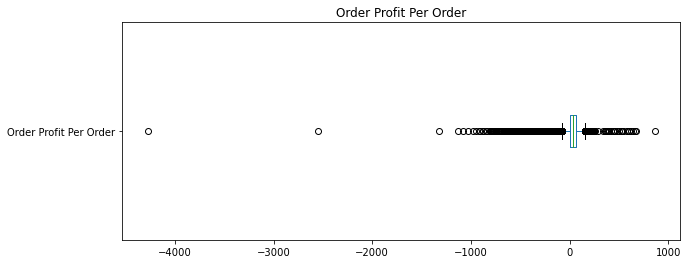

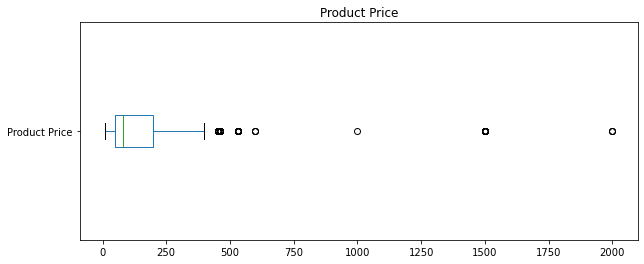

In [17]:
for column in data_num:
    plt.figure(figsize=(10,4))
    data_num.boxplot([column], vert=False, grid=False)
    plt.title(column)
    plt.show()

From boxplot created above, several point can be derived:

a. Outliers exist in Benefit per order, Sales per customer, Order Item Discount, Order Item Product Price, Order Item Profit Ratio, Sales, Order Item Total, Order Profit Per Order, Product Price

### Data Preprocessing

According to prior search, SVM most likely does not have prior assumptions, therefore we can proceed with current data and make preparation for training, test, and validation data. The special treatment is we gonna use stratified sampling accross data.

Source:
https://stackoverflow.com/questions/35422072/major-assumptions-of-machine-learning-classifiers-lg-svm-and-decision-trees

In [18]:
rand_seed = 123
np.random.seed(rand_seed)

In [19]:
X = data_num.drop("Days for shipping (real)", axis=1)
y = data_cat["Late_delivery_risk"].astype(int)

In [20]:
# Assuming X is your feature matrix and y are your labels
# Generate a random sample for training, testing, and validating
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=rand_seed, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=rand_seed, stratify=y_temp)

<b>Support vector machines (SVMs)</b> are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

Source: https://scikit-learn.org/stable/modules/svm.html

In [21]:
X_train.count

<bound method DataFrame.count of        Days for shipment (scheduled)  Benefit per order  Sales per customer  \
33233                              4          36.470001          107.889999   
66212                              2          73.940002          254.970001   
52991                              4          36.410000          163.990005   
94208                              4         -90.669998          278.980011   
25272                              1          57.590000          119.980003   
...                              ...                ...                 ...   
81974                              4          -4.200000           83.989998   
77131                              4          64.099998          237.410004   
23951                              4           6.910000           92.129997   
11009                              1          81.629997          170.070007   
99493                              4          87.330002          181.929993   

       Order Item 

In [ ]:
#### Train a Random Forest classifier

#### Define the parameter grid
#param_grid = {
    #'C': [0.1, 1, 10, 100, 1000],
#    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']#,
    #'degree': [2, 3, 4],  # only used when kernel is 'poly'
    #'gamma': [1, 0.1, 0.01, 0.001, 0.0001],  # not used when kernel is 'linear'
    #'coef0': [0.0, 0.1, 0.5]  # only used when kernel is 'poly' or 'sigmoid'
#}


#### Create a base model
#svm_base = svm.SVC(random_state=rand_seed)

#### Instantiate the grid search model
#grid_search = GridSearchCV(estimator=svm_base, param_grid=param_grid,
#                           cv=2, n_jobs=-1, verbose=2)

#### Fit the grid search to the data
#grid_search.fit(X_train, y_train)

#### Get the best parameters
#best_params = grid_search.best_params_

#print("Best parameters: ", best_params)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [23]:
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    f1 = f1_score(actual, pred)
    recall = recall_score(actual, pred)
    precision = precision_score(actual, pred)
    return accuracy, f1, recall, precision

In [24]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Order_Delivery")

<Experiment: artifact_location='mlflow-artifacts:/102778540419101379', creation_time=1696053492284, experiment_id='102778540419101379', last_update_time=1696053492284, lifecycle_stage='active', name='Order_Delivery', tags={}>

In [25]:
if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    rand_seed = 123
    np.random.seed(rand_seed)

    with mlflow.start_run(run_name="order_delivery_linear"):
        clf = svm.SVC(kernel="linear", random_state=rand_seed)
        clf.fit(X_train, y_train)
    
        # Test SVM Model on Test Data
        y_pred = clf.predict(X_test)
        (accuracy, f1, recall, precision) = eval_metrics(y_test, y_pred)

        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")

        mlflow.log_param("accuracy", accuracy)
        mlflow.log_param("f1 score", f1)
        mlflow.log_param("recall", recall)
        mlflow.log_param("precision", precision)

        # Test SVM Model on validation data
        y_val_pred = clf.predict(X_val)
        (val_accuracy, val_f1, val_recall, val_precision) = eval_metrics(y_val, y_val_pred)

        print(f"Validation Accuracy: {val_accuracy}")
        print(f"Validation F1 Score: {val_f1}")
        print(f"Validation Recall: {val_recall}")
        print(f"Validation Precision: {val_precision}")

        mlflow.log_param("validation_accuracy", val_accuracy)
        mlflow.log_param("validation_f1 score", val_f1)
        mlflow.log_param("validation_recall", val_recall)
        mlflow.log_param("validation_precision", val_precision)

        predictions = clf.predict(X_train)
        signature = infer_signature(X_train, predictions)
        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            mlflow.sklearn.log_model(clf, "model", registered_model_name="OrderDelivery", signature=signature)
        else:
            mlflow.sklearn.log_model(clf, "model", signature=signature)    

Accuracy: 0.689807976366322
F1 Score: 0.6810933940774488
Recall: 0.604040404040404
Precision: 0.7806788511749347
Validation Accuracy: 0.6853766617429837
Validation F1 Score: 0.6712962962962964
Validation Recall: 0.5858585858585859
Validation Precision: 0.7859078590785907


Registered model 'OrderDelivery' already exists. Creating a new version of this model...
2023/09/30 17:22:18 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: OrderDelivery, version 3
Created version '3' of model 'OrderDelivery'.


In [ ]:
X_train.columns

In [ ]:
clf.coef_

In [ ]:
# Assuming clf is your trained model and feature_names is the list of feature names
importance = clf.coef_[0]

# summarize feature importance
for i, j in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X_train.columns[i], j))

# plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(X_train.columns, importance)
plt.xticks(rotation=90)  # Rotate feature names for readability
plt.show()

From the SVM model, the best parameter to use is kernel="linear" which yield almost perfect result. Since the model uses linear kernel, the feature importance can be measured using coefficient of hyperplane

In [ ]:
import plotly.express as px
fig = px.scatter(data_1, x='Days for shipping (real)', y='Days for shipment (scheduled)', color='Late_delivery_risk')
fig.show()

From this graph, it can be stated that it is obvious that if there is a gap between scheduled shipping and actual shipping, then it must be late.